In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

os.getcwd()
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loss: MSE, epochs = 5
1. No activation in last layer, loss = 0.0871
2. Sigmoid in last layer, loss = 0.0871
3. tanh in last layer, loss = 0.0872
4. relu in last layer, loss = 0.1056



In [ ]:
data = tf.data.Dataset.from_tensor_slices((
    (train_images.astype(np.float32)/255),(train_images.astype(np.float32)/255)))
data_fmnist = data.shuffle(buffer_size =120000).batch(128)
test_data_fmnist = tf.data.Dataset.from_tensor_slices(
    ((test_images.astype(np.float32)/255), (test_images.astype(np.float32)/255))).batch(128)

In [ ]:
model_dense = keras.models.Sequential([keras.layers.Flatten(),
                                keras.layers.Dense(392, activation=tf.nn.relu),
                                keras.layers.Dense(128, activation=tf.nn.relu),
                                keras.layers.Dense(64, activation= tf.nn.relu, name= 'encoder'),
                                keras.layers.Dense(64, activation= tf.nn.relu),
                                keras.layers.Dense(128, activation= tf.nn.relu),
                                keras.layers.Dense(392, activation= tf.nn.relu),
                                keras.layers.Dense(784, activation= tf.nn.relu),
                                keras.layers.Reshape((-1,28,28))]
                                )

In [ ]:
model.compile(optimizer= 'adam',
              loss = tf.losses.mean_squared_error
              )

In [ ]:
model_dense.fit(data_fmnist,epochs= 5)


In [ ]:
#reconstructing image of the last layer of decoder

test_data_fmnist = ((test_images.astype(np.float32)/255))
output = model_dense(test_data_fmnist)
image = output[9999]
image = tf.squeeze(image, 0)
plt.imshow(image)

Loss: MSE, epochs = 5, Conv2DTranspose
1. No activation in last layer, loss = 1.1374e-05
2. Sigmoid in last layer, loss = 5.6050e-04
3. tanh in last layer, loss = 1.4835e-04
4. relu in last layer, loss = 3.9464e-05

Loss: MSE, epochs = 5, Upsample

1. No activation in last layer, loss = 0.0031
2. Sigmoid in last layer, loss = 0.0032
3. tanh in last layer, loss = 0.0031
4. relu in last layer, loss = 0.0033

cnn_Transpose

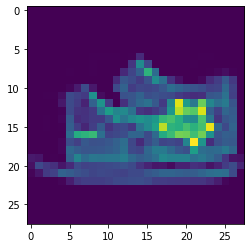

relu

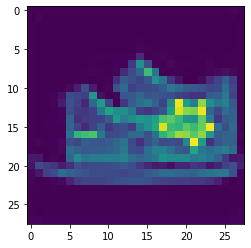

tanh

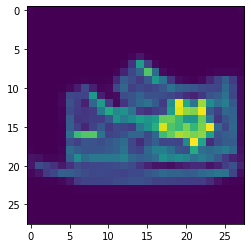

sigmoid

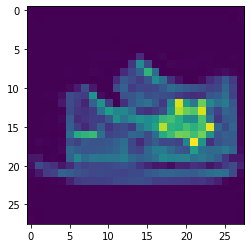

no activation

cnn_upsampling

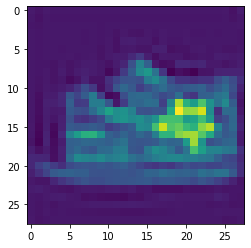

tanh

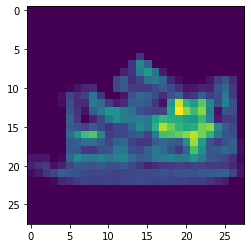

sigmoid

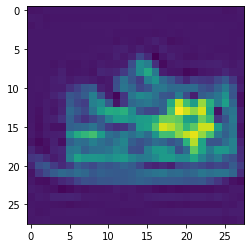

relu

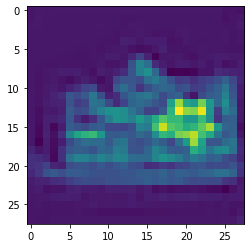

no activation



In [ ]:
data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1,28,28,1]).astype(np.float32)/255,train_images.reshape([-1,28,28,1]).astype(np.float32)/255,))
data_fmnist = data.shuffle(buffer_size =120000).batch(128)

test_data_fmnist = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1,28,28,1]).astype(np.float32)/255, test_images.reshape([-1,28,28,1]).astype(np.float32)/255)).batch(128)

In [ ]:
model_cnn_t = keras.Sequential([keras.layers.Conv2D(filters= 16,kernel_size=[3,3],kernel_initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),use_bias = True,bias_initializer='zeros',padding = 'same',activation = 'relu',input_shape=(28,28,1)),
                          keras.layers.Conv2D(filters= 32,kernel_size=[3,3],kernel_initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),use_bias = True,bias_initializer='zeros',padding = 'same',activation = 'relu'),
                          keras.layers.Conv2DTranspose(filters=1, kernel_size=[3,3],kernel_initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),use_bias = True,bias_initializer='zeros',padding = 'same',activation = 'sigmoid')
                          ])

In [ ]:
model_cnn_up = keras.Sequential([keras.layers.Conv2D(filters= 16,kernel_size=[3,3],kernel_initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),use_bias = True,bias_initializer='zeros',padding = 'same',activation = 'relu',input_shape=(28,28,1)),
                           keras.layers.MaxPool2D(pool_size=(2,2),padding='same'),
                          keras.layers.Conv2D(filters= 32,kernel_size=[3,3],kernel_initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),use_bias = True,bias_initializer='zeros',padding = 'same',activation = 'relu'),
                          keras.layers.UpSampling2D(size= (2,2)),
                          keras.layers.Conv2D(filters=1, kernel_size=[3,3],kernel_initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None),use_bias = True,bias_initializer='zeros',padding = 'same',activation = 'tanh')
                          ])

In [ ]:
model_cnn_t.compile(optimizer= 'adam',
              loss = tf.losses.mean_squared_error
              )

In [ ]:
model_cnn_t.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 28, 28, 1)         289       
Total params: 5,089
Trainable params: 5,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_cnn_t.fit(data_fmnist, epochs= 5)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0099
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 1.7073e-04
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 1.1467e-04
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 9.3986e-05
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 6.7368e-05


In [ ]:
#reconstructing image of the last layer of decoder

test_data_fmnist = ((test_images.astype(np.float32)/255))
output = model_cnn_t(test_data_fmnist)
image = output[9999]
image = tf.squeeze(image, 2)
plt.imshow(image)

Classification

In [ ]:
model_encoder = keras.models.Sequential([keras.layers.Flatten(),
                                keras.layers.Dense(392, activation=tf.nn.relu),
                                keras.layers.Dense(128, activation=tf.nn.relu),
                                keras.layers.Dense(64, activation= tf.nn.relu)])
model_decoder = keras.models.Sequential([keras.layers.Dense(64, activation= tf.nn.relu),
                                keras.layers.Dense(128, activation= tf.nn.relu),
                                keras.layers.Dense(392, activation= tf.nn.relu),
                                keras.layers.Dense(784, activation= tf.nn.relu),
                                keras.layers.Reshape((-1,28,28))]
                                )

In [7]:
model = keras.models.Sequential([model_encoder,model_decoder])
model.compile(optimizer= 'adam',loss = tf.losses.mean_squared_error)
model.fit(data_fmnist, epochs= 5)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1134
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1116
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1116
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1112
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1112


In [ ]:
data = tf.data.Dataset.from_tensor_slices((
    (train_images.astype(np.float32)/255),(train_labels.astype(np.int32))))
data_fmnist = data.shuffle(buffer_size =120000).batch(128)
test_data_fmnist = tf.data.Dataset.from_tensor_slices(
    ((test_images.astype(np.float32)/255), ( test_labels.astype(np.int32)))).batch(128)


In [ ]:
data

In [ ]:
model_encoder.trainable = False

In [ ]:
class_model = keras.models.Sequential([keras.layers.Dense(64, activation=tf.nn.relu, input_shape = (64,)),
                                keras.layers.Dense(32, activation=tf.nn.relu),
                                keras.layers.Dense(16, activation= tf.nn.relu),
                                
                                keras.layers.Dense(10,use_bias= True,bias_initializer='zeros' )
                                ])

In [ ]:
class_model.build((128,64))

In [12]:
class_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                170       
Total params: 6,938
Trainable params: 6,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fina_model = keras.models.Sequential([model_encoder,
                                      class_model])

In [17]:
fina_model.compile(optimizer= 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ['accuracy'])
fina_model.fit(data_fmnist, epochs= 20)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.6130 - accuracy: 0.3764
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 1.5967 - accuracy: 0.3826
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 1.5845 - accuracy: 0.3884
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 1.5728 - accuracy: 0.3929
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 1.5640 - accuracy: 0.3956
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 1.5562 - accuracy: 0.3996
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 1.5488 - accuracy: 0.4034
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 1.5447 - accuracy: 0.4035
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 1.5364 - accuracy: 0.4078
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 1.5324 - accuracy: 0.4096

In [16]:
fina_model.evaluate(test_data_fmnist)

79/79 [==============================] - 0s 3ms/step - loss: 1.6166 - accuracy: 0.3774


[1.6166075468063354, 0.3774000108242035]

In [ ]:
classification_model = keras.models.Sequential([keras.layers.Flatten(),
                                keras.layers.Dense(392, activation=tf.nn.relu),
                                keras.layers.Dense(128, activation=tf.nn.relu),
                                keras.layers.Dense(64, activation= tf.nn.relu, name= 'encoder'),
                                keras.layers.Dense(64, activation= tf.nn.relu),
                               keras.layers.Dense(10, activation= tf.nn.relu) ])

In [19]:
classification_model.compile(optimizer= 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ['accuracy'])
classification_model.fit(data_fmnist, epochs= 20)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7670 - accuracy: 0.7176
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5954 - accuracy: 0.7689
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4244 - accuracy: 0.8402
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3142 - accuracy: 0.8852
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2917 - accuracy: 0.8917
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2768 - accuracy: 0.8978
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2628 - accuracy: 0.9015
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2544 - accuracy: 0.9046
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2428 - accuracy: 0.9092
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2324 - accuracy: 0.9120

In [20]:
classification_model.evaluate(test_data_fmnist)

79/79 [==============================] - 0s 3ms/step - loss: 0.3371 - accuracy: 0.8927


[0.3371073603630066, 0.8927000164985657]